In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/WC_AT.csv")
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


<Axes: xlabel='Waist', ylabel='AT'>

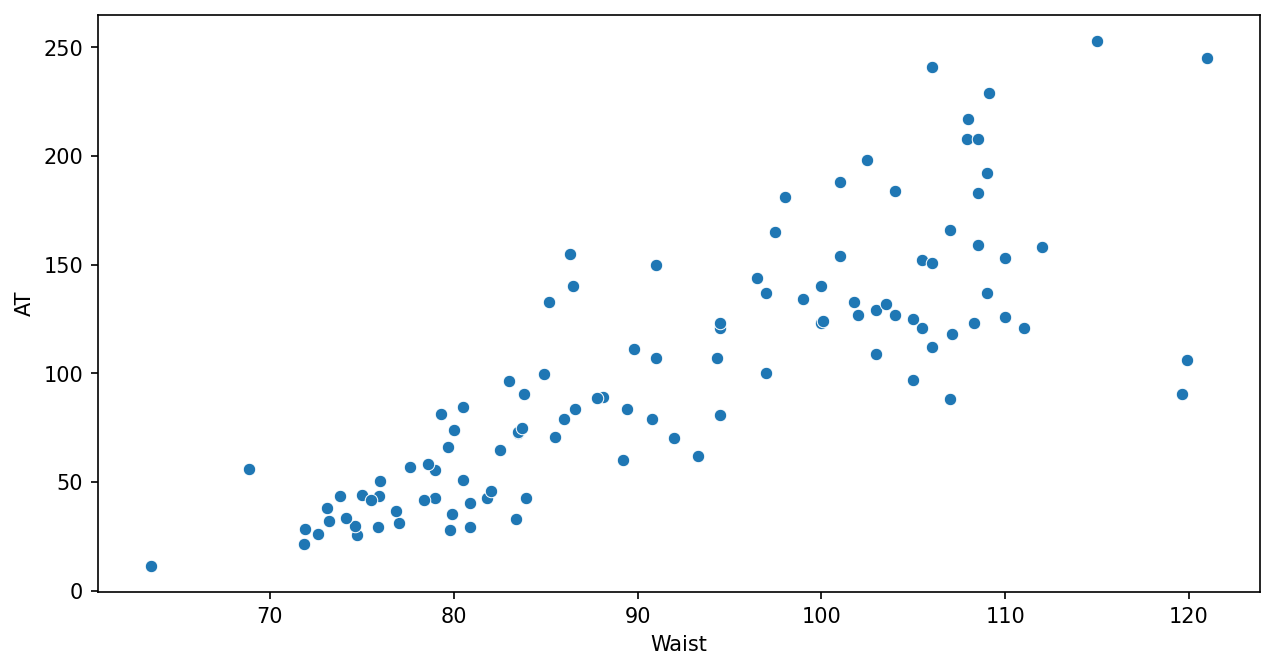

In [3]:
sns.scatterplot(x = data['Waist'],y = data['AT'])

<Axes: >

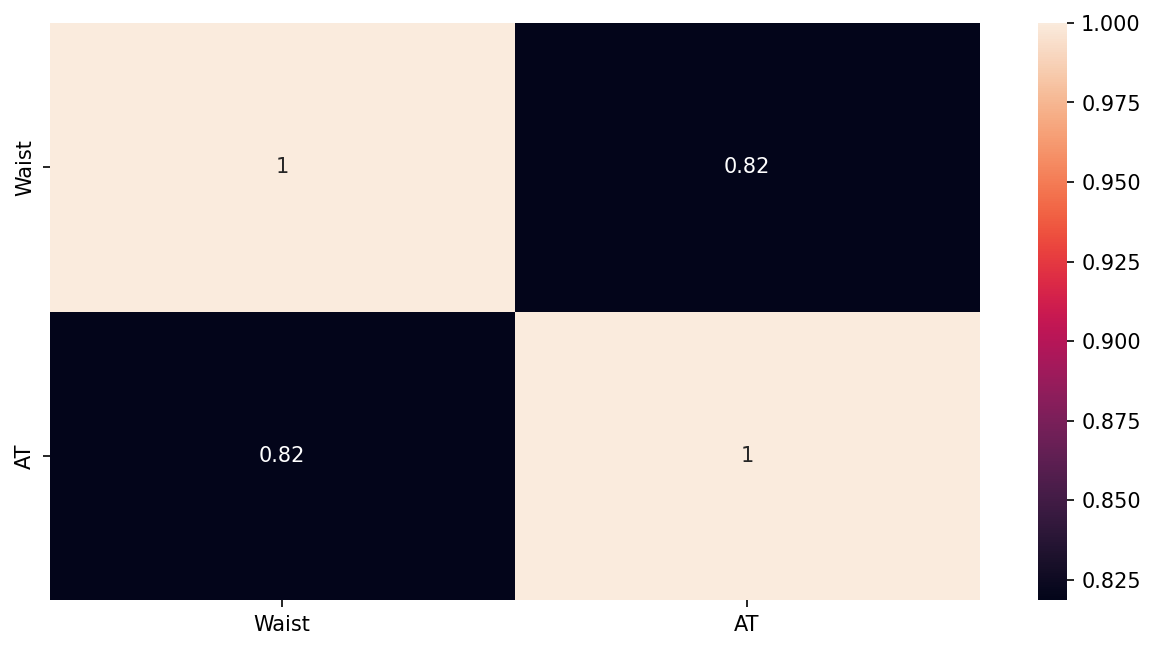

In [4]:
sns.heatmap(data.corr(), annot= True)

In [5]:
import statsmodels.formula.api as smf

In [6]:
model = smf.ols('AT~Waist', data = data).fit()

In [7]:
model

In [8]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [9]:
model.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

In [10]:
model.rsquared , model.rsquared_adj

(0.670036893052843, 0.6669531256981966)

In [11]:
t_Waist = 90
t_AT = 3.45*t_Waist + (-215.98)
t_AT

94.52000000000001

In [12]:
Test = pd.DataFrame(
        {
            'Waist' : [40,65,75,95,200]
        })
Test

,Waist
0,40
1,65
2,75
3,95
4,200


In [13]:
model.predict(Test)

0    -77.627112
1      8.844373
2     43.432966
3    112.610154
4    475.790390
dtype: float64

<Axes: xlabel='AT', ylabel='Density'>

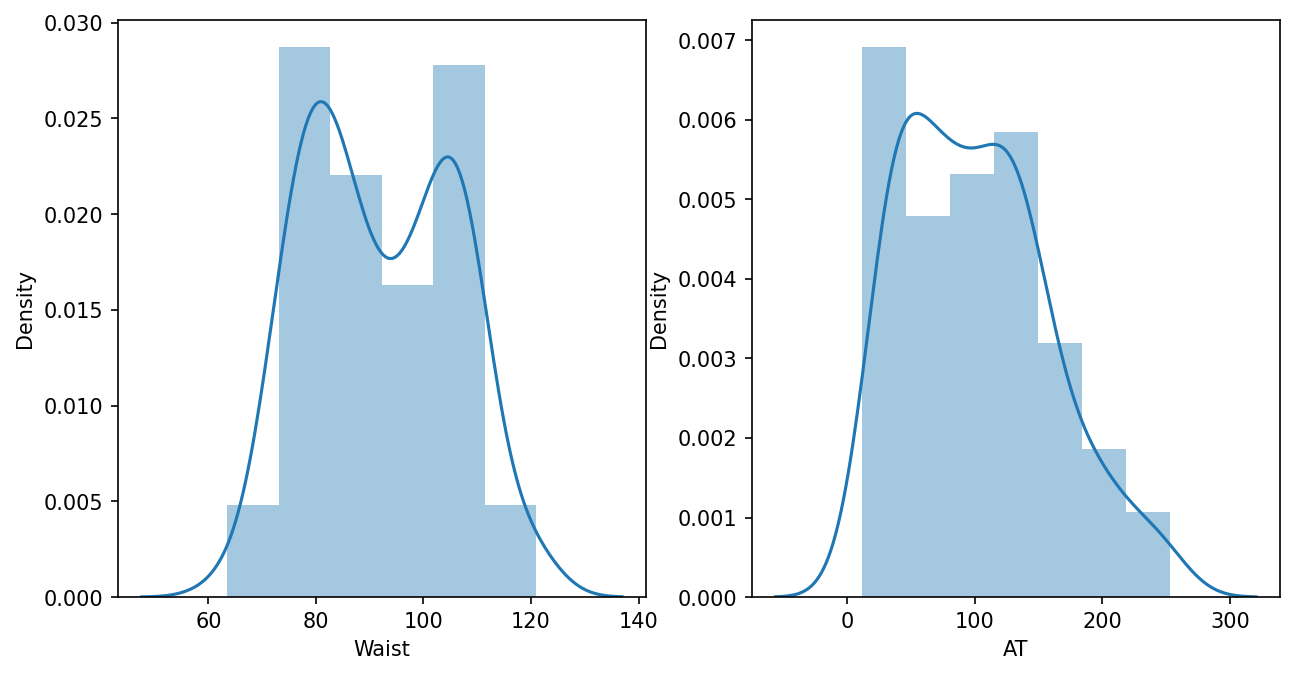

In [14]:
plt.subplot(1,2,1)
sns.distplot(data['Waist'])
plt.subplot(1,2,2)
sns.distplot(data['AT'])

<Axes: xlabel='Waist', ylabel='Density'>

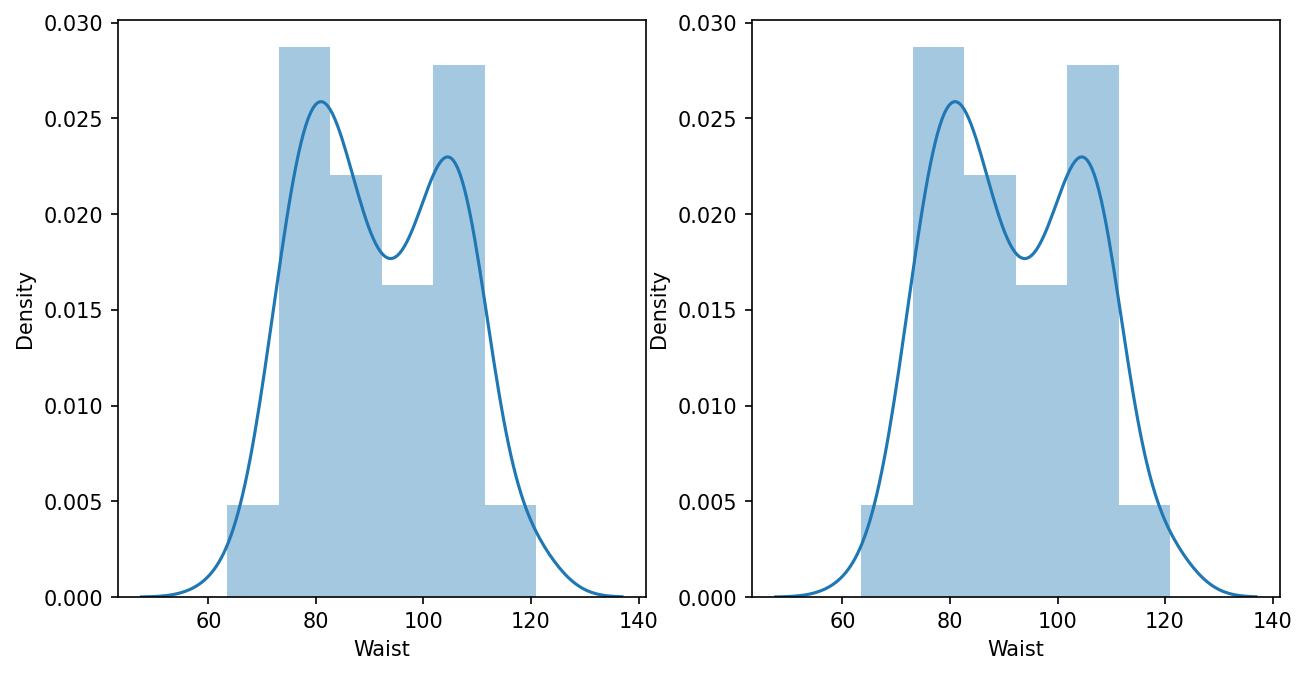

In [15]:
data['sqrt_Waist'] = np.sqrt(data['Waist'])
plt.subplot(1,2,1)
sns.distplot(data['Waist'])
data['sqrt_AT'] = np.sqrt(data['AT'])
plt.subplot(1,2,2)
sns.distplot(data['Waist'])

In [16]:
data['Waist'].skew()

0.1340560824786468

In [17]:
data['sqrt_Waist'].skew()

0.03581548461397095